In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
nMTCD = 10000
MTCD_grouping = pd.read_csv(f'MTCD_grouping_{nMTCD}.csv', index_col=False)
MTCD_grouping.head()

,MTCD_id,x,y,clusters
0,0,-88.080,518.657,0
1,1,-571.714,248.386,1
2,2,-167.818,347.715,2
3,3,642.901,624.657,3
4,4,-327.945,539.603,4


In [6]:
np.unique(MTCD_grouping.clusters)

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    24,    25,    26,    27,    29,
          30,    31,    32,    33,    34,    37,    38,    39,    41,
          42,    46,    48,    51,    52,    53,    55,    57,    58,
          61,    62,    63,    64,    67,    68,    69,    70,    71,
          73,    74,    75,    78,    79,    80,    84,    85,    89,
          92,    93,    95,    97,    98,    99,   101,   102,   104,
         106,   108,   110,   112,   113,   115,   117,   121,   122,
         125,   127,   130,   131,   138,   139,   143,   145,   155,
         159,   160,   161,   162,   164,   166,   176,   178,   181,
         182,   188,   190,   197,   198,   202,   221,   225,   226,
         227,   231,   234,   235,   237,   240,   242,   247,   254,
         263,   268,   270,   274,   287,   294,   295,   312,   313,
         316,   317,

In [7]:
group_sizes = MTCD_grouping['clusters'].value_counts().sort_index()
group_sizes

0        159
1        159
2        162
3        120
4        138
        ... 
10106     96
11624    106
14070    119
16553     55
17330    108
Name: clusters, Length: 219, dtype: int64

In [8]:
print(max(group_sizes), min(group_sizes), np.average(group_sizes))

192 55 136.986301369863


<BarContainer object of 219 artists>

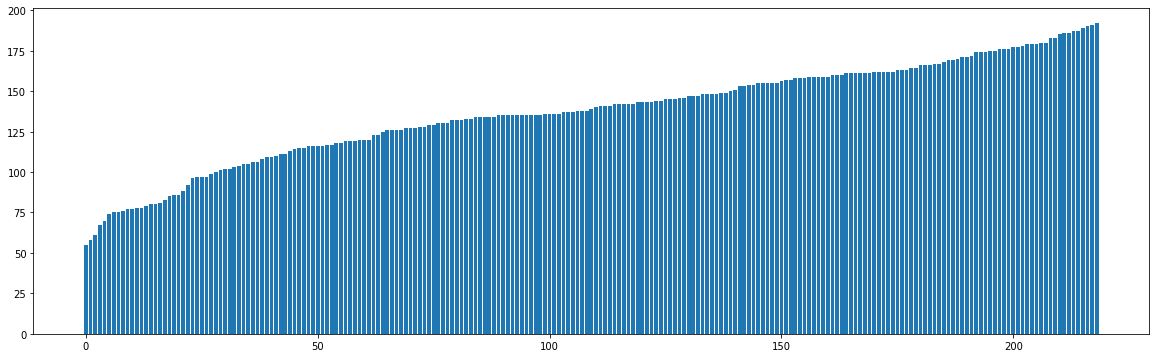

In [9]:
plt.figure(figsize=(20,6))
x = np.arange(len(group_sizes))
plt.bar(x,sorted(group_sizes.values))

<BarContainer object of 101 artists>

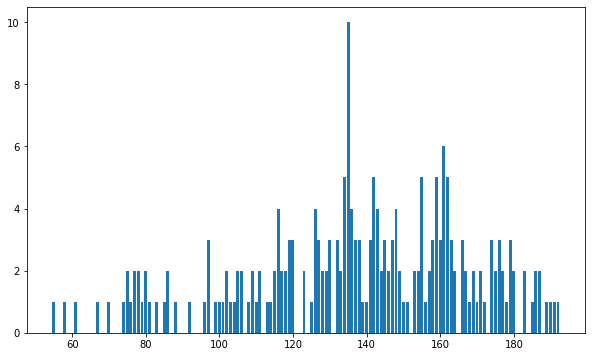

In [18]:
plt.figure(figsize=(10,6))
plt.bar(group_sizes.value_counts().index,group_sizes.value_counts().values)

In [31]:
MTCD_RA = pd.read_csv(f'MTCD_RA_Time_{nMTCD}.csv', index_col=False)
MTCD_RA.head()

,RA_init,RA_first,RA_success,RA_transmit
0,321,321,-1,0
1,157,157,-1,0
2,265,265,-1,0
3,367,367,-1,0
4,408,408,-1,0


In [32]:
MTCD_data = pd.concat([MTCD_grouping, MTCD_RA], axis=1,sort=False)

In [33]:
MTCD_data

,MTCD_id,x,y,clusters,RA_init,RA_first,RA_success,RA_transmit
0,0,-88.080,518.657,0,321,321,-1,0
1,1,-571.714,248.386,1,157,157,-1,0
2,2,-167.818,347.715,2,265,265,-1,0
3,3,642.901,624.657,3,367,367,-1,0
4,4,-327.945,539.603,4,408,408,-1,0
...,...,...,...,...,...,...,...,...
9995,9995,6.597,-132.146,290,661,661,-1,0
9996,9996,916.042,-383.395,36,561,561,-1,0
9997,9997,546.724,303.712,522,630,630,-1,0
9998,9998,915.375,326.959,221,334,334,-1,0


In [34]:
MTCD_data.to_csv(f'MTCD_data_{nMTCD}.csv', index=False)